In [1]:
from covid_lib import read_covid_data
import numpy as np
import matplotlib.pyplot as plt

from aidam.math_utils import lag_correlation_ext
from scipy.stats import pearsonr
from aidam.aicharts import plotyy

## Lettura e preprocessing dati

In [2]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 292
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-12-11T17:00:00


## Calcolo LAG correlation

In [6]:
max_delay=60
delays=list(range(0,max_delay))

x_name_list=['nuovi_positivi']
y_name='deceduti_giornalieri'


y=trend[y_name]['Italia']


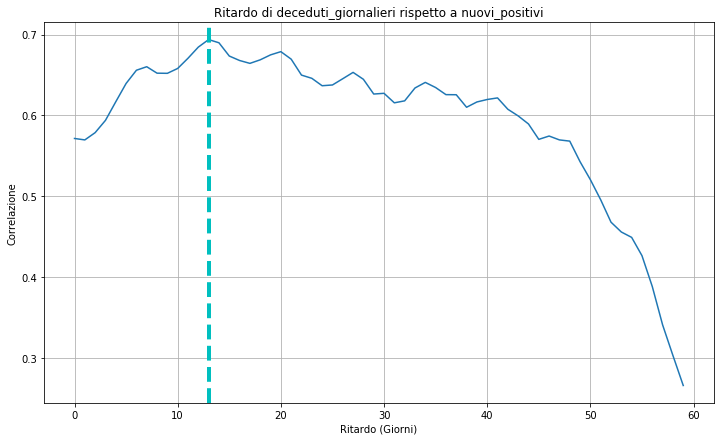

In [7]:
for x_name in x_name_list:
    x=trend[x_name]['Italia']
    if x_name=='perc_tamponi_positivi':
        x[0]=x[1]
    corrs,betas=lag_correlation_ext(x,y,delays,corr_fun=pearsonr)
    max_point=np.argmax(corrs)
    
    fig,ax=plt.subplots(1,figsize=(12,7))
    ax.plot(delays,corrs,label='Correlazione')
    ax.grid()
    ax.set_xlabel('Ritardo (Giorni)')
    ax.set_ylabel('Correlazione')
    ax.set_title('Ritardo di %s rispetto a %s'%(y_name,x_name))
    ax.axvline(x=max_point,c='c', linewidth=4,ls='--')

In [5]:
y

array([0.0000e+00, 0.0000e+00, 2.0000e+00, 4.2000e+01, 1.0000e+00,
       4.0000e+00, 3.3000e+01, 6.6000e+01, 1.1000e+01, 1.1600e+02,
       1.3800e+02, 1.0900e+02, 6.6000e+01, 3.3000e+01, 1.0200e+02,
       2.8000e+02, 4.1000e+01, 2.1300e+02, 1.8100e+02, 5.2700e+02,
       3.6900e+02, 4.1400e+02, 1.9200e+02, 1.0840e+03, 4.1500e+02,
       6.8900e+02, 9.4300e+02, 9.5200e+02, 4.0800e+02, 8.9400e+02,
       1.0360e+03, 9.9900e+02, 5.8900e+02, 1.4340e+03, 6.4600e+02,
       1.5900e+03, 1.1090e+03, 1.1180e+03, 1.4310e+03, 1.4800e+03,
       1.2380e+03, 8.1900e+02, 1.0220e+03, 1.5550e+03, 2.0990e+03,
       1.9790e+03, 1.9850e+03, 2.0790e+03, 1.6770e+03, 1.2240e+03,
       1.6950e+03, 9.6200e+02, 2.0720e+03, 2.5630e+03, 2.2000e+03,
       2.1280e+03, 1.8220e+03, 2.7230e+03, 2.9430e+03, 3.0330e+03,
       2.9220e+03, 2.6220e+03, 1.8080e+03, 1.6960e+03, 2.3170e+03,
       2.3110e+03, 4.6930e+03, 2.3040e+03, 1.6650e+03, 1.7400e+03,
       1.2250e+03, 2.3520e+03, 8.0140e+03, 3.0310e+03, 2.7470e